In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

T = 100000
t = np.arange(1, T+1)
t_2_3 = (t**0.67)*np.sqrt(np.log(t)) # NOTE: MIGHT HAVE LOG(T) HERE
sqrtT =  np.sqrt(t)*np.log(t)
t_34 = (t**(3/4))*np.log(t)

In [2]:
import pandas as pd
import os

def get_cumr_T(T_alpha, T, r_explor, r_exploit):
    r = np.zeros(T)
    r[:T_alpha] = r_explor
    r[T_alpha:] = r_exploit
    r = np.cumsum(r)
    return r

tot_seeds = 50 # NOTE: to change

n = 6039  # NOTE: can change
k = 18  # NOTE: can change
c = 0.05555555555555555
A_list = 0

fname = ''

ucb_folder = f'../../ucb/logs_ucb_mlens/{c}/n6039_k18_{T}_0'
dual_folder = f'../../dual/logs_dual_lambda1_mlens/{c}/n6039_k18_{T}_0'
ef_folder = f'../../ef/logs_ef_mlens/6039_18/0/{c}'

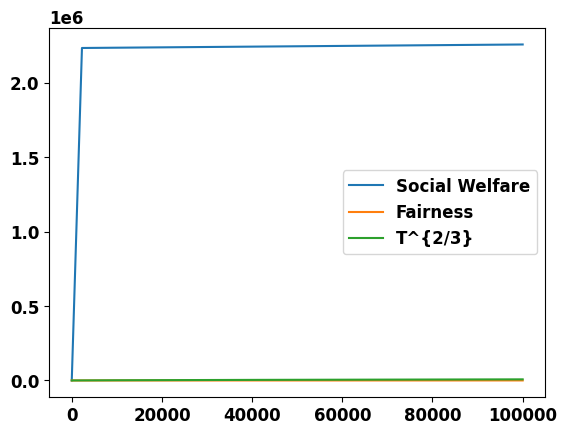

In [3]:
sws_ef = np.zeros((tot_seeds, T))
frs_ef = np.zeros((tot_seeds, T))

for seed in range(1, tot_seeds+1):
    df = pd.read_csv(f"{ef_folder}/0.67_{T}_0_{seed}/logs.csv",  delimiter='\t', header=None)
    T_alpha = int(df.iloc[0, -1].split(', ')[-1])
    swr_explor = float(df.iloc[1, :].item().split(', ')[-2])
    fr_explor = float(df.iloc[1, :].item().split(', ')[-1])
    
    swr_exploit = float(df.iloc[2, :].item().split(', ')[-2])
    fr_exploit = float(df.iloc[2, :].item().split(', ')[-1])
    
    frs_ef[seed-1] = get_cumr_T(T_alpha, T, fr_explor, fr_exploit)
    sws_ef[seed-1] = get_cumr_T(T_alpha, T, swr_explor, swr_exploit) 

sw_ef = sws_ef.mean(0)
fr_ef = frs_ef.mean(0)


with open(f'{fname}_sw_ef.npy', 'wb') as f:
    np.save(f, sw_ef)

with open(f'{fname}_fr_ef.npy', 'wb') as f:
    np.save(f, fr_ef)

plt.clf()
plt.plot(sw_ef, label='Social Welfare')
plt.plot(fr_ef, label='Fairness')
plt.plot(t_2_3, label='T^{2/3}')
plt.legend()
plt.show()

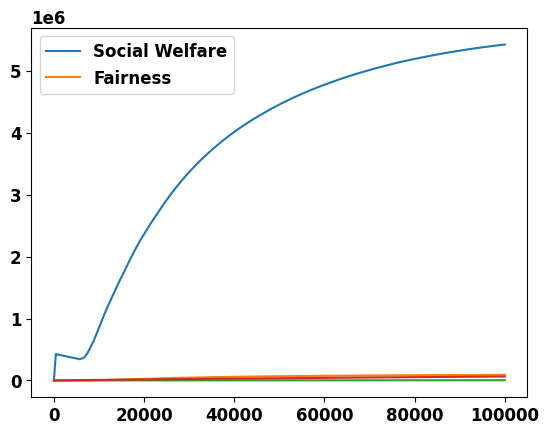

In [4]:
sws_ucb = np.zeros((tot_seeds, T))
frs_ucb = np.zeros((tot_seeds, T))

for seed in range(1, tot_seeds+1):
    df = pd.read_csv(f"{ucb_folder}/logs_{seed}.csv", header=None)
    sws_ucb[seed-1] = df.iloc[:, -2].to_numpy()
    frs_ucb[seed-1] = df.iloc[:, -1].to_numpy()

sws = sws_ucb.mean(0)
frs = frs_ucb.mean(0)

with open(f'{fname}_sw_ucb.npy', 'wb') as f:
    np.save(f, sws)

with open(f'{fname}_fr_ucb.npy', 'wb') as f:
    np.save(f, frs)

plt.clf()
plt.plot(sws, label='Social Welfare')
plt.plot(frs, label='Fairness')
plt.plot(sqrtT)
plt.plot(t_34)
plt.legend()
plt.show()

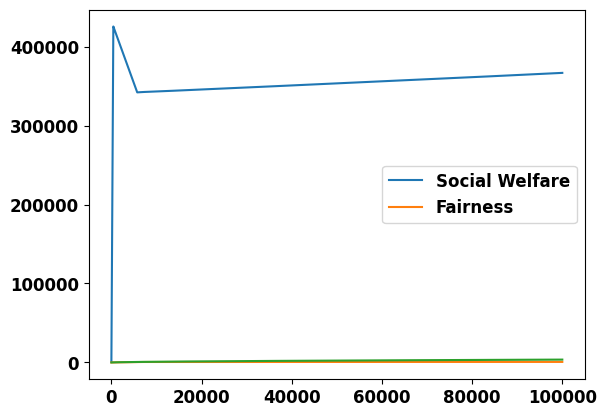

In [5]:
sws_dual = np.zeros((tot_seeds, T))
frs_dual = np.zeros((tot_seeds, T))

for seed in range(1, tot_seeds+1):
    df = pd.read_csv(f"{dual_folder}/logs_{seed}.csv", header=None)
    sws_dual[seed-1] = df.iloc[:, -2].to_numpy()
    frs_dual[seed-1] = df.iloc[:, -1].to_numpy()

sws = sws_dual.mean(0)
frs = frs_dual.mean(0)

with open(f'{fname}_sw_dual.npy', 'wb') as f:
    np.save(f, sws)

with open(f'{fname}_fr_dual.npy', 'wb') as f:
    np.save(f, frs)

plt.clf()
plt.plot(sws, label='Social Welfare')
plt.plot(frs, label='Fairness')
plt.plot(sqrtT)
# plt.plot(t_34)
plt.legend()
plt.show()

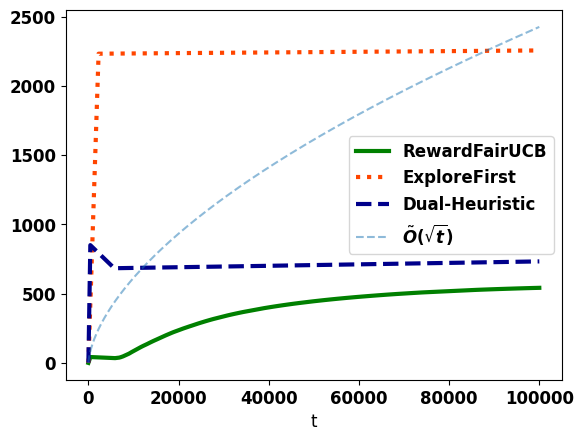

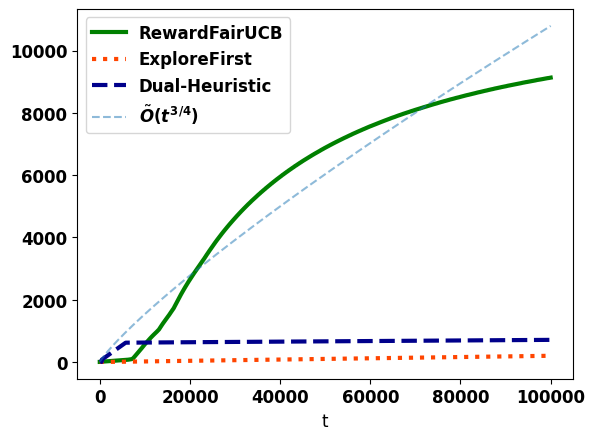

In [6]:
K = 10000
K2 = 1000
K3 = 500
plt.clf()
plt.plot(np.load('_sw_ucb.npy')/K, label='RewardFairUCB', linewidth=3, color='green', linestyle='solid')
plt.plot(np.load('_sw_ef.npy')/K2, label='ExploreFirst', linewidth=3, color='orangered', linestyle='dotted')
plt.plot(np.load('_sw_dual.npy')/K3, label='Dual-Heuristic', linewidth=3, color='darkblue', linestyle='--')
# plt.plot(np.sqrt(t), label='sqrt(T)')
# plt.title('Social Welfare regret')
plt.plot(sqrtT/1.5, label=r'$\tilde{O}(\sqrt{t})$', linestyle='dashed', alpha=0.5)
plt.xlabel('t')
plt.legend()
plt.savefig('SW-mlens.jpg', bbox_inches = 'tight', pad_inches = 0.25)
plt.show()

K = 10
K2 = 1
K3 = 1
plt.clf()
plt.plot(np.load('_fr_ucb.npy')/K, label='RewardFairUCB', linewidth=3, color='green', linestyle='solid')
plt.plot(np.load('_fr_ef.npy')/K2, label='ExploreFirst', linewidth=3, color='orangered', linestyle='dotted')
plt.plot(np.load('_fr_dual.npy')/K3, label='Dual-Heuristic', linewidth=3, color='darkblue', linestyle='--')
plt.plot(t_34/6, label=r'$\tilde{O}(t^{3/4})$', linestyle='dashed', alpha=0.5)
plt.xlabel('t')
# plt.title('Fairness regret')
plt.legend()
plt.savefig('FR-mlens.jpg', bbox_inches = 'tight', pad_inches = 0.25)
plt.show()